In [6]:
import pytesseract
import cv2
import matplotlib.pyplot as plt

In [7]:
path = '../data/project/img.jpg'
image = cv2.imread(path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [8]:
text = pytesseract.image_to_string(rgb_image, lang='kor+eng')
print(text)

김윤웅

Kim Yunwoong
0123456789#$

 



In [9]:
insta_test_path = '../data/project/ocr_test.jpg'
insta_test_img = cv2.imread(insta_test_path)
rgb_insta_test_img = cv2.cvtColor(insta_test_img, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(rgb_insta_test_img, lang='kor+eng')
print(text)

wees TG

FIs oe

주   eaiari OFF MOLICN

- 비닐편 -

Go) gaugaeg

 



In [10]:
# 아이폰 메모 텍스트 인식
memo_path = '../data/project/memo.jpg'
memo_img = cv2.imread(memo_path)
memo_img = cv2.cvtColor(memo_img, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(memo_img, lang='kor+eng')
print(text)

19:59                                        rT |        | 51 |
ant are. fe                           uae

OpenCV OCR A|#t
202314 92! 62! +22! 19:59

*)

 



In [11]:
white_memo_path = '../data/project/white_memo.jpg'
white_memo_img = cv2.imread(white_memo_path)
white_memo_img = cv2.cvtColor(white_memo_img, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(white_memo_img, lang='kor+eng')
print(text)

0060170\×ㅁ 0ㅇㅠ 시작
2023년 9월 6일 수요일 19:59



In [12]:
from imutils.perspective import four_point_transform
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [13]:
# 이미지 확인 함수
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

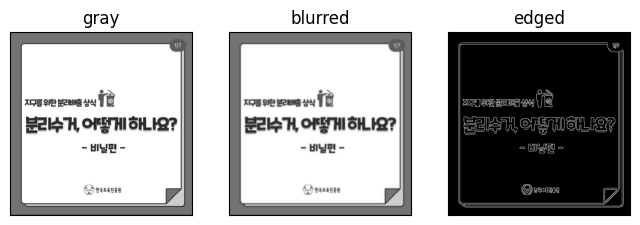

In [14]:
# 인식률을 높여보자

# find countours

image = rgb_insta_test_img.copy()
image = imutils.resize(image, width=500)
ratio = rgb_insta_test_img.shape[1] / float(image.shape[-1])

# 이미지를 graysclae로 변환하고 blur를 적용
# 모서리를 찾기 위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)

plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

In [17]:
# contour: 같은 값을 가진 곳을 연결한 선
# 이미지의 외곽선을 검출하기 위해 사용

# contour를 찾아 크기가 작은 순으로 정렬
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

photo_cnt = None

# 정렬된 contour를 반복문으로 수행하며 윤곽 추출
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    print(len(approx))  # 5, 3, 11, 16

    # 전체이미지를 가져올 거니까
    if len(approx) == 5:
        photo_cnt = approx
        break

# 만약 추출한 윤곽이 없을 경우 오류
if photo_cnt is None:
    raise Exception(("Could not find receipt outline."))

5


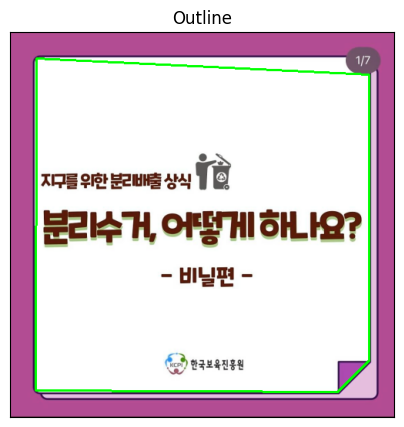

In [18]:
output = image.copy()

cv2.drawContours(output, [photo_cnt], -1, (0, 255, 0), 2)
plt_imshow("Outline", output)

In [21]:
# 찾은 윤곽을 기준으로 이미지를 보정
insta_photo = four_point_transform(rgb_insta_test_img, photo_cnt.reshape(4, 2) * ratio)
plt_imshow("after transform", insta_photo)

ValueError: cannot reshape array of size 10 into shape (4,2)

In [ ]:
# 안 괜찮고 ValueError: cannot reshape array of size 10 into shape (4,2) 발생

In [20]:
insta_photo = four_point_transform(rgb_insta_test_img, photo_cnt.reshape(5, 2) * ratio)
plt_imshow("after transform", insta_photo)

ValueError: too many values to unpack (expected 2)

In [ ]:
# drawContours의 parameter

# - InputOutputArray : image
# = Destination image

# - InputArrayOfArrays: contours 
# = All the input contours. Each contour is stored as a point vector

# - int: coutourIdx => -1 => 모든 컨투어를 그림
# = Parameter indicating a contour to draw. If it is negative, all the contours are drawn.

# - const Scalar &: color => (0, 255, 0) = 녹색
# = Color of the contours

# - int: thickness
# = Thickness of lines the contours are drawn with.
# = If it is negative(for example, thickness=FILLED), the contour interiors are drawn.
# 음수로 작성하면 컨투어 내부가 채워짐

In [ ]:
# instaloader라는 크롤링 라이브러리도 있다 ^^
# google cloud vision api가 사진 내 텍스트 추출 잘 해줌...
